## $$ \begin{cases} y' = \frac{y}{t} + t \cdot \sec\left(\frac{y}{t}\right), & t \in (0,1) \\ y(0) = 0 & f(0,0) = 0\\ y(t) = t \cdot \arcsin(t) \end{cases} $$


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
def dy_dt(t, y):
    return y / t + t * 1/np.cos(y/t)


def analytical(t, **kwargs):
    return t * np.arcsin(t)

In [45]:
def get_convergence_order(e1, e2, n2, n1):
    return np.log(e1 / e2) / np.log(n2 / n1)


def approximate_with_method(method, h, t0, tf, y0):
    t_values = np.arange(t0, tf + h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    y_values[1] = y_values[0] # Por Taylor 2 se usa la condición del enunciado del problema f(0,0) = 0 -> f'(0,0) = 0
    for j in range(1, len(t_values) - 1):
        dy = dy_dt(t_values[j], y_values[j])
        y_values[j + 1] = method(yj=y_values[j], h=h, dy=dy, t=t_values[j], dy_dt=dy_dt)
    return t_values, y_values


def plot_approximation_results(method, method_name, n_values, t0, tf, y0, table):
    t_values_analytical = np.linspace(t0, tf, 256)
    y_analytical = [analytical(t) for t in t_values_analytical]

    for i, n in enumerate(n_values):
        h = (tf - t0) / n

        t_values, y_aprox = approximate_with_method(method, h, t0, tf, y0)

        y_exact = y_analytical[-1]
        error = abs(y_aprox[-1] - y_exact)

        table["y_aprox"].append(y_aprox[-1])
        table["y_exact"].append(y_exact)
        table["error"].append(error)
        table["N"].append(n)
        table["h"].append(h)

        if i > 0:
            previous_error = table["error"][i - 1]
            previous_n = table["N"][i - 1]
            convergence_order = get_convergence_order(
                previous_error, error, n, previous_n
            )
            table["convergence_rate"].append(convergence_order)

        plt.plot(
            t_values,
            y_aprox,
            label=f"h = {h}",
            marker="^",
            linestyle="",
            markersize="4",
            color="r",
        )

        plt.plot(
            t_values_analytical,
            y_analytical,
        )
        plt.title(f"Approximation for step size {h} using {method_name}", fontsize="15")
        plt.xlabel("time (t)")
        plt.ylabel("y(t)")
        plt.grid()
        plt.show()

    table["convergence_rate"].append(np.nan)
    print(pd.DataFrame(table))


In [46]:
# given values, re used for all methods
number_of_subintervals = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
# in this problem the h step is calculated based of the number of sub_intervals
t0 = 0
tf = 1
y0 = 0

def get_new_table():
    return {
        "N": [],
        "h": [],
        "y_aprox": [],
        "y_exact": [],
        "error": [],
        "convergence_rate": [],
    }


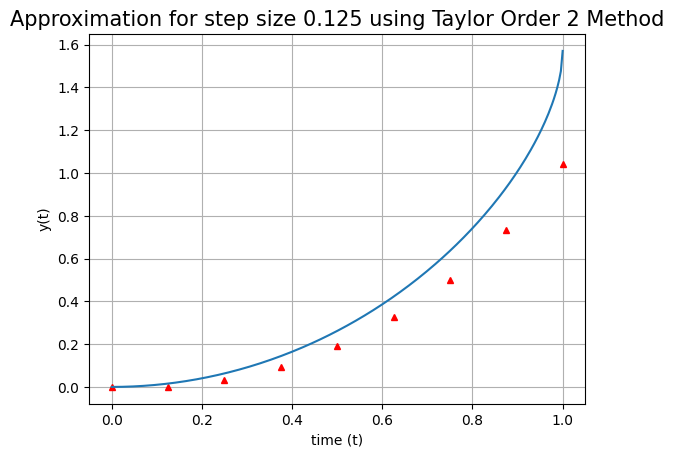

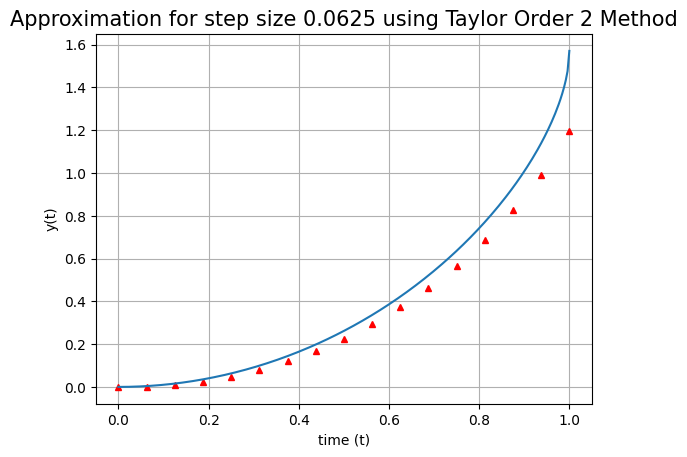

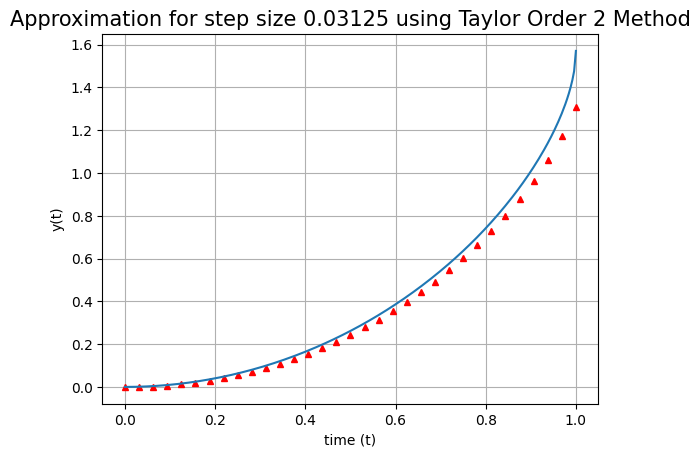

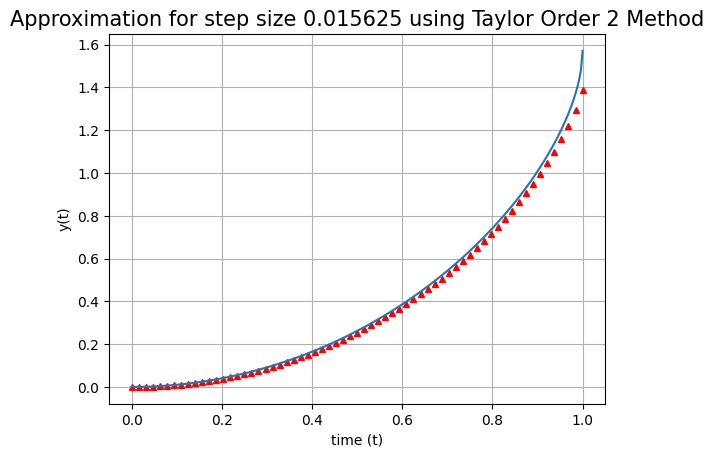

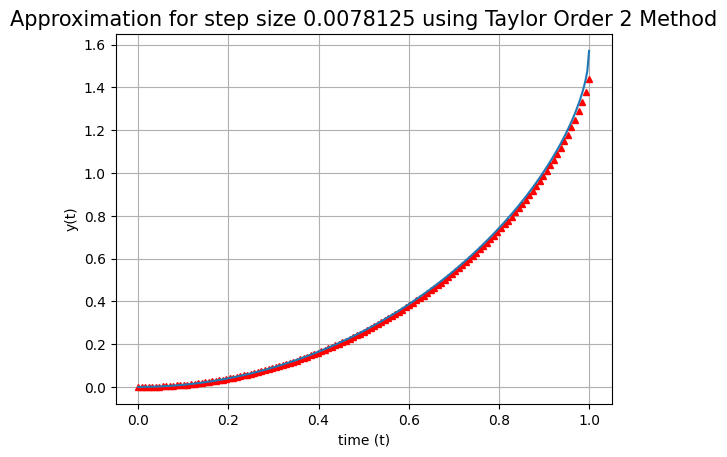

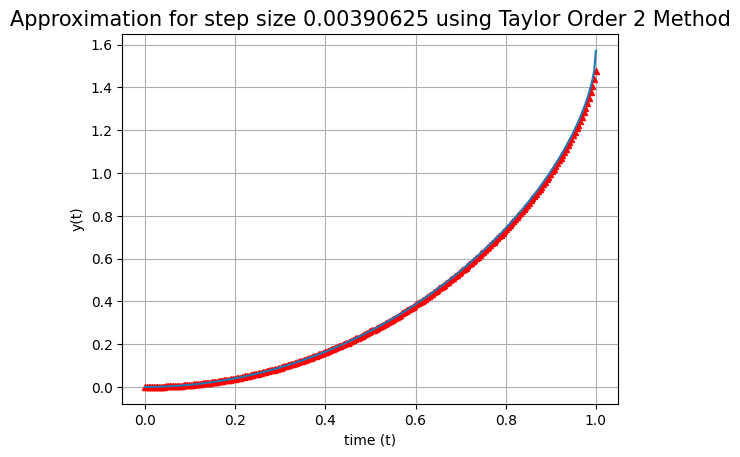

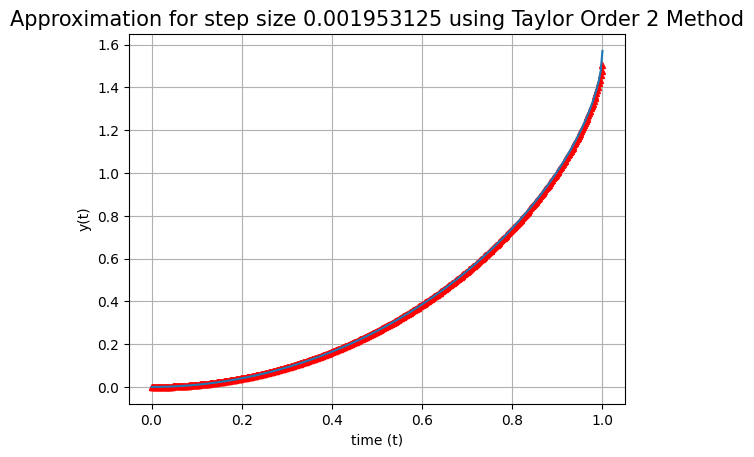

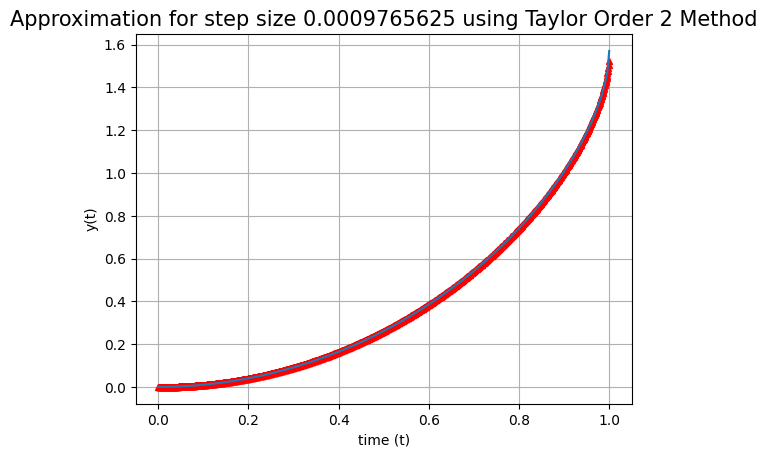

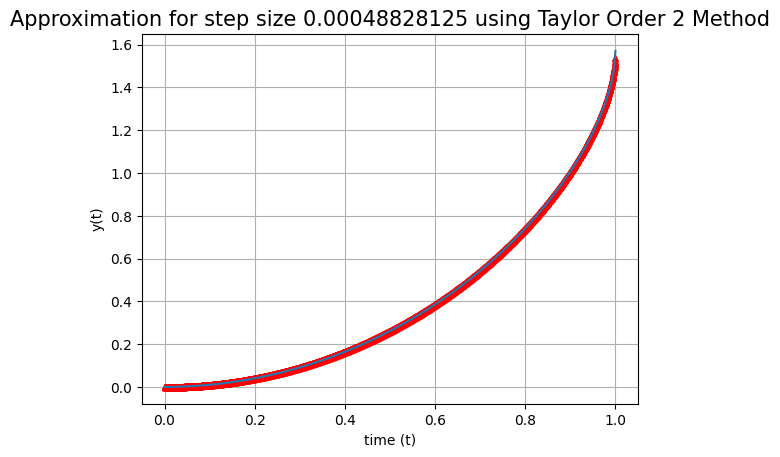

      N         h   y_aprox   y_exact     error  convergence_rate
0     8  0.125000  1.040422  1.570796  0.530375          0.506896
1    16  0.062500  1.197553  1.570796  0.373243          0.506988
2    32  0.031250  1.308149  1.570796  0.262648          0.505487
3    64  0.015625  1.385781  1.570796  0.185015          0.503718
4   128  0.007812  1.440308  1.570796  0.130489          0.502314
5   256  0.003906  1.478675  1.570796  0.092121          0.501368
6   512  0.001953  1.505718  1.570796  0.065078          0.500784
7  1024  0.000977  1.524804  1.570796  0.045992          0.500440
8  2048  0.000488  1.538285  1.570796  0.032511               NaN


In [47]:
def dy2_dt(t, y):
    a = (dy_dt(t, y) * t - y) / t ** 2
    b = 1/np.cos(y/t)
    c = t  * a * b * np.tan(y/t)
    return a + b + c


def taylor_2(yj, h, t, **kwargs):
    return (
        yj + h * dy_dt(t, yj) + (h**2) / 2 * dy2_dt(t, yj)
    )


plot_approximation_results(
    method=taylor_2,
    method_name="Taylor Order 2 Method",
    n_values=number_of_subintervals,
    t0=t0,
    tf=tf,
    y0=y0,
    table=get_new_table(),
)


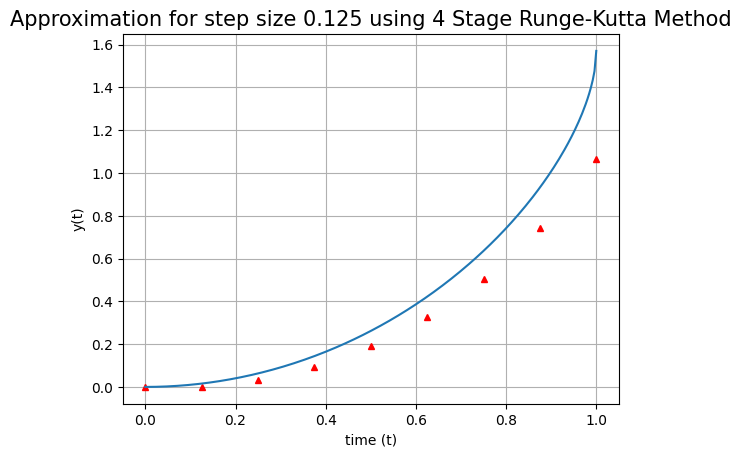

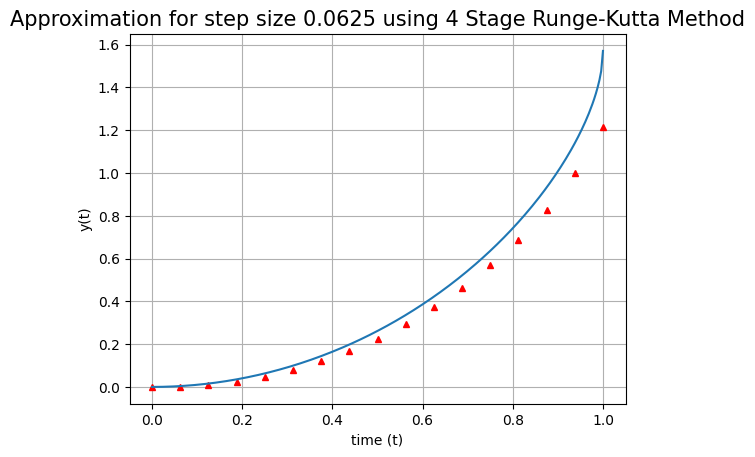

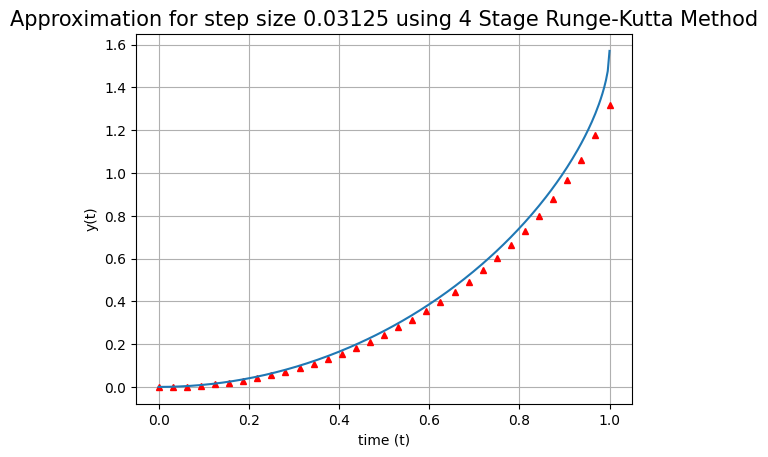

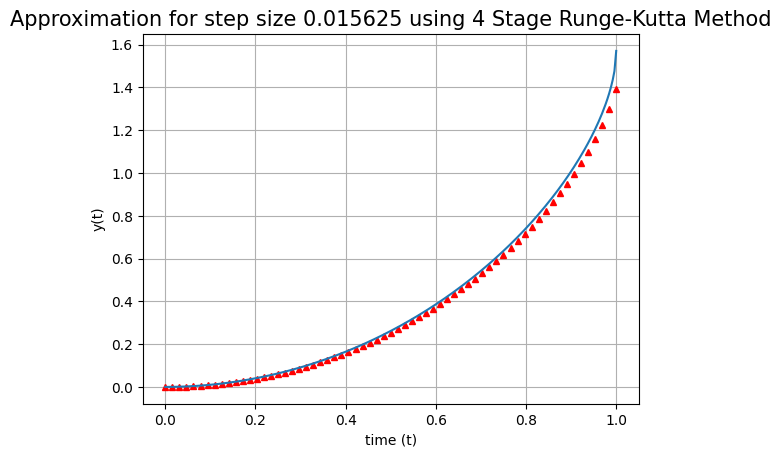

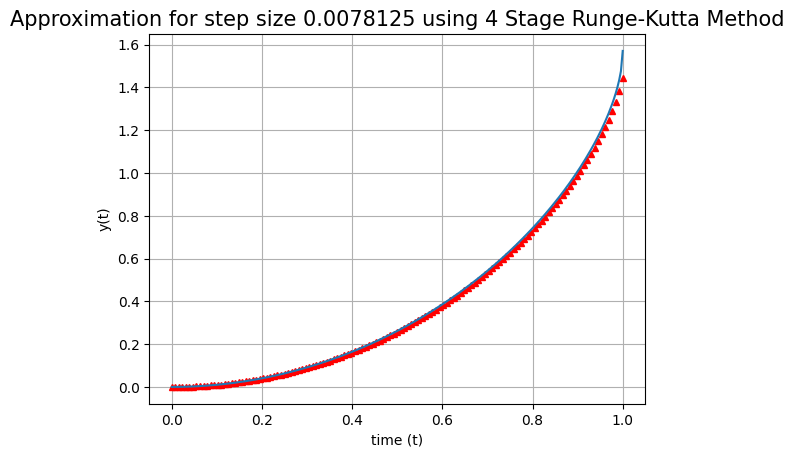

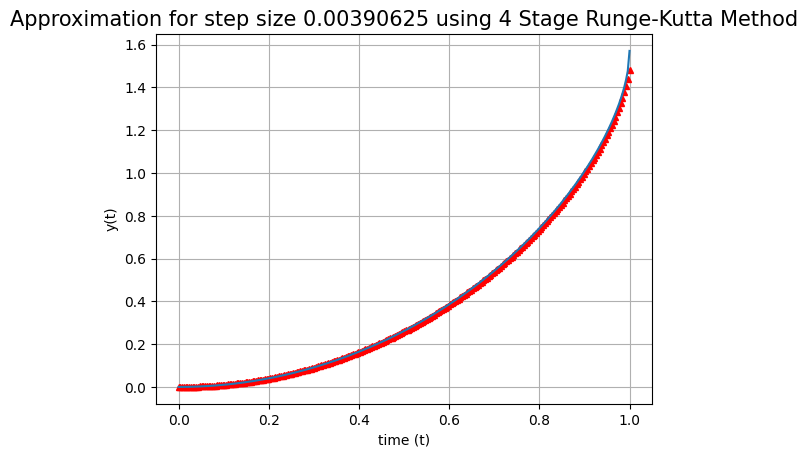

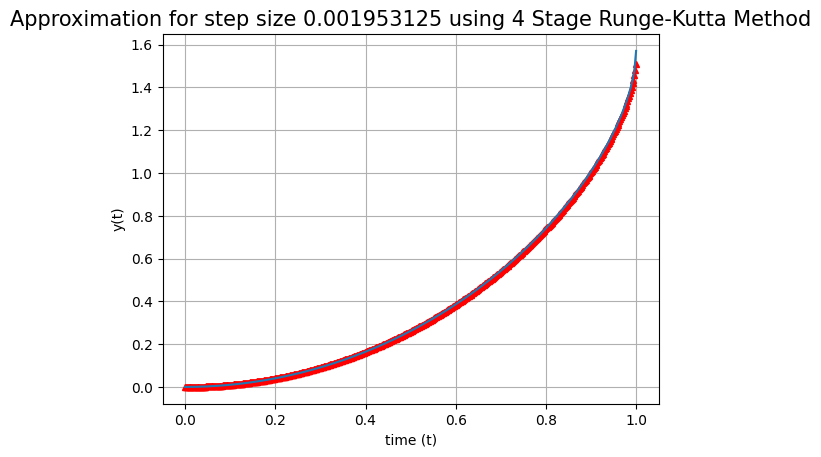

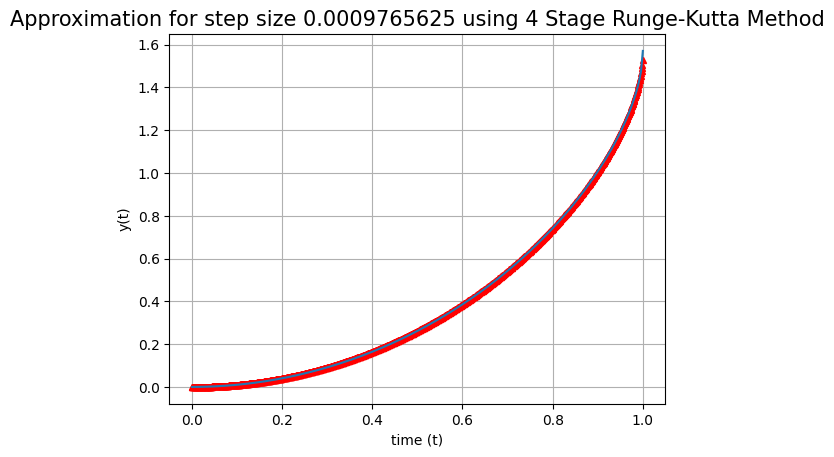

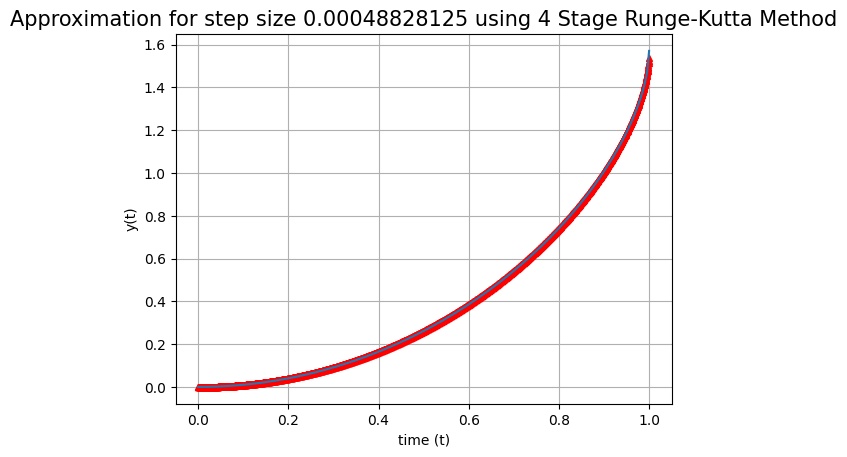

      N         h   y_aprox   y_exact     error  convergence_rate
0     8  0.125000  1.064078  1.570796  0.506718          0.507688
1    16  0.062500  1.214397  1.570796  0.356399          0.503800
2    32  0.031250  1.319447  1.570796  0.251349          0.501887
3    64  0.015625  1.393298  1.570796  0.177499          0.500940
4   128  0.007812  1.445368  1.570796  0.125429          0.500469
5   256  0.003906  1.482134  1.570796  0.088663          0.500234
6   512  0.001953  1.508113  1.570796  0.062684          0.500117
7  1024  0.000977  1.526476  1.570796  0.044321          0.500059
8  2048  0.000488  1.539458  1.570796  0.031338               NaN


In [48]:
def runge_kutta_4_stage(yj, t, h, dy_dt, **kwargs):
    # Stage 1
    k1 = dy_dt(t, yj)

    # Stage 2
    k2 = dy_dt(t + h / 2, yj + h / 2 * k1)

    # Stage 3
    k3 = dy_dt(t + h / 2, yj + h / 2 * k2)

    # Stage 4
    k4 = dy_dt(t + h, yj + h * k3)

    # Combine stages to compute yj_{n+1}
    phi = (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    y_next = yj + h * phi

    return y_next


plot_approximation_results(
    method=runge_kutta_4_stage,
    method_name="4 Stage Runge-Kutta Method",
    n_values=number_of_subintervals,
    t0=t0,
    tf=tf,
    y0=y0,
    table=get_new_table()
)
